In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np


In [3]:
#Positionwise carbon
df=pd.read_excel("aa_properties.xlsx")
# H-wise Carbon 
#df=pd.read_excel("aa_properties2.xlsx")
# identity
#df=pd.read_excel("aa_properties3.xlsx")
df

,aa,CA-Gly,Pro-MC,CB,CB-Pro,Carboxyl,Amide,His,Trp,Phe-Tyr,OH-Tyr,CG,CD,CE,OH,SH,S,NH3,Arg,MC
0,A,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
1,C,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4
2,D,0,0,1,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,4
3,E,0,0,1,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,4
4,F,0,0,1,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,4
5,G,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
6,H,0,0,1,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,4
7,I,0,0,1,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,4
8,K,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,4
9,L,0,0,1,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,4


In [4]:
def peptrans(peptide):
    rows=[]
    for l in peptide:
        rows.append(df[df.aa==l])
    return pd.concat(rows).sum()

In [5]:
pf=pd.read_excel("Clean_results_2_2019.xlsx")

/home/gergely/anaconda3/lib/python3.7/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
/home/gergely/anaconda3/lib/python3.7/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Conditional Formatting extension is not supported and will be removed
  for idx, row in parser.parse():


In [7]:
transpf=pf['Peptide'].apply(peptrans)

In [12]:
mergepf = pd.concat([pf, transpf], axis=1, sort=False)

In [13]:
mergepf["Prot_pep"] = mergepf["Protein"].map(str) +"_"+ mergepf["Peptide"]
mergepf["Prot_res_pep"] = mergepf["Protein"].map(str) +"_"+ mergepf["Residue number"].map(str)+"_"+ mergepf["Peptide"]
mergepf=mergepf.set_index('Prot_res_pep')
mergepf=mergepf.rename(columns={u'Survivin, 1 µg/ml': u'Fluorescence'})

In [11]:
i=0
LastClst=[]
for idx,pept in mergepf.iterrows():
    if pept['Peptide'][-1]=='C':
        print (pept['Peptide'], pept['Fluorescence'])
        i=i+1
        LastClst.append(True)
    else:
        LastClst.append(False)
print (i)
mergepf['LastC']=LastClst

VKSYLYQILQGIVFC 2169.5
HPSLGHQVSYLPRMC 205.5
EQNSVTLEVLLVKVC 742.0
EARDDLHCPWCTLNC 1388.5
SRGIIRIINPITMQC 209.5
VKDVLFIRPRKYIHC 1022.5
FWLQELNEDLAEMGC 4460.0
CRSPDSEEGNDMVFC 3059.0
SWLCRSCVLGIYPQC 768.0
HVSCALWIPEVSIAC 369.5
SHIPPSRWALVCNLC 817.5
VCNLCKLKTGACIQC 373.0
KLKTGACIQCSIKSC 394.0
AKESSPAWRTPSSEC 937.5
WLSRSVTSFFRYRQC 1154.0
GGTTAPGPIHLLELC 1730.0
KKTAEEPAASGRIIC 889.0
KKHGSGSGSGAKERC 990.0
AQNQEICSSGQHNAC 399.5
VQREQSLHSFHTLFC 1854.5
PCDHPRQPCDSSCPC 297.0
ECQNRFPGCRCKAQC 324.0
FPGCRCKAQCNTKQC 0.0
TCGAADHWDSKNVSC 682.0
GMCRVIPPPDWRPEC 1590.5
EIEQEYWRLVEEKDC 9311.5
KPRKWLQLETSERRC 1337.0
MVVQENENVVFCLEC 5712.5
LRFQSSAVMALQEAC 587.5
YAPRGELYKELQKSC 1054.0
GILKVPEGSWLCRTC 568.0
TKVSHIPSSRWALVC 1069.5
TILAENDEVKFKSYC 1362.0
TYMVTRREKIKRSVC 1597.0
KGERQQQGEAHDGAC 1405.5
AGAGRPGLPQGRHLC 1141.0
KFEGAVVCVALIFAC 2024.5
VGLLLMQMPEEEAFC 4181.0
LRELFKPSMAELGLC 1370.5
TDEAVSGWKFEIHRC 907.0
FPLLELLAMALNPHC 106.0
NVQIIAALIKPFGQC 1100.5
DKWVIPALKQIREIC 1526.0
KQIWKCLAENAVYLC 2108.0
CLAENAVYLC

In [30]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#clf = svm.SVC(gamma=0.001)
#clf = RandomForestClassifier(max_depth=None, n_estimators=100, max_features='auto')
#clf = MLPClassifier(solver='lbfgs',random_state=1, max_iter=10000)
clf = MLPClassifier(hidden_layer_sizes=(2,), random_state=1, max_iter=10000)
#clf = GaussianProcessClassifier(1.0 * RBF(1.0))
#clf = DecisionTreeClassifier(max_depth=5)
#clf = KNeighborsClassifier(5)
#clf = AdaBoostClassifier()

#Y=np.array(mergepf[mergepf['LastC']==False][u'Fluorescence']>0)
#X = np.array(mergepf[(mergepf[u'LastC']==False)][
X = np.array(mergepf[
    [u'CA-Gly', u'Pro-MC', u'CB', u'CB-Pro',
        u'Carboxyl', u'Amide',
        u'His', u'Trp', u'Phe-Tyr', u'OH-Tyr', u'CG', u'CD', u'CE',
        u'OH', u'SH', u'S', u'NH3', u'Arg',u'MC']])



#X = np.array(mergepf[[u'CA-Gly', u'Pro-MC', 
#         u'Carboxyl', u'Amide',
#         u'His', u'Trp', u'Phe-Tyr', u'OH-Tyr', u'CH2', u'CH', u'CH3',
#         u'OH', u'SH', u'S', u'NH3', u'Arg', u'MC']])[1::3]
#         u'OH', u'SH', u'S', u'NH3', u'Arg', u'MC']])

Y=np.array(mergepf[u'Fluorescence']>0)
#Y=np.array(mergepf[u'Fluorescence']>0)[1::3]

#Y=np.array(mergepf[mergepf['LastC']==False][u'Fluorescence']>0)
#X = np.array(mergepf[(mergepf[u'LastC']==False)][[u'CA-Gly', u'Pro-MC', 
#         u'Carboxyl', u'Amide',
#         u'His', u'Trp', u'Phe-Tyr', u'OH-Tyr', u'CH2', u'CH', u'CH3',
#         u'OH', u'SH', u'S', u'NH3', u'Arg', u'MC']])


#X = np.array(mergepf[(mergepf[1::3][u'Fluorescence']>100)|(mergepf[u'Fluorescence']==0)][[u'CA-Gly', u'Pro-MC', 
#         u'Carboxyl', u'Amide',
#         u'His', u'Trp', u'Phe-Tyr', u'OH-Tyr', u'CH2', u'CH', u'CH3',
#         u'OH', u'SH', u'S', u'NH3', u'Arg', u'MC']])

#X = np.array(mergepf[(mergepf[u'Fluorescence']>100)|(mergepf[u'Fluorescence']==0)][[u'CA-Gly', u'Pro-MC', 
#         u'Carboxyl', u'Amide',
#         u'His', u'Trp', u'Phe-Tyr', u'OH-Tyr', u'CH2', u'CH', u'CH3',
#         u'OH', u'SH', u'S', u'NH3', u'Arg', u'MC']])


#X= np.array(mergepf[[u'A', u'C', u'D', u'E', u'F',
#       u'G', u'H', u'I', u'K', u'L',
#       u'M', u'N', u'P', u'Q', u'R', u'S', u'T',
#       u'Y', u'W', u'V']])
sc=StandardScaler()


X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.5, shuffle=True)

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

#    X, np.array(mergepf[(mergepf[u'Fluorescence']>100)|(mergepf[u'Fluorescence']==0)][u'Fluorescence']>100), test_size=0.5, shuffle=True)
#    X, np.array(mergepf[1::3][(mergepf[u'Fluorescence']>100)|(mergepf[u'Fluorescence']==0)][u'Fluorescence']>100), test_size=0.5, shuffle=True)
clf.fit(X_train, y_train)
predict=clf.predict(X_test)
predict

array([ True,  True, False, ..., False,  True, False])

In [23]:
sc=StandardScaler()


y_train=Y
y_test=Y
X_train = sc.fit_transform(X)
X_test = sc.fit_transform(X)

#    X, np.array(mergepf[(mergepf[u'Fluorescence']>100)|(mergepf[u'Fluorescence']==0)][u'Fluorescence']>100), test_size=0.5, shuffle=True)
#    X, np.array(mergepf[1::3][(mergepf[u'Fluorescence']>100)|(mergepf[u'Fluorescence']==0)][u'Fluorescence']>100), test_size=0.5, shuffle=True)
clf.fit(X_train, y_train)
predict=clf.predict(X_test)
predict

array([ True,  True,  True, ..., False, False, False])

In [68]:
%matplotlib qt

import importlib
import VisualizeNN as VisNN
importlib.reload(VisNN)


network_structure = np.hstack((17, np.asarray(clf.hidden_layer_sizes), 1))

network=VisNN.DrawNN(network_structure, clf.coefs_)
network.draw()



Confusion matrix:
[[1524  160]
 [ 350  664]]


/home/gergely/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


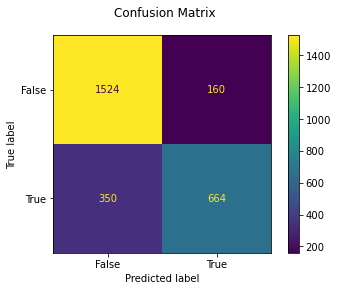

In [31]:
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [32]:
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predict)}\n")

Classification report for classifier MLPClassifier(hidden_layer_sizes=(2,), max_iter=10000, random_state=1):
              precision    recall  f1-score   support

       False       0.81      0.90      0.86      1684
        True       0.81      0.65      0.72      1014

    accuracy                           0.81      2698
   macro avg       0.81      0.78      0.79      2698
weighted avg       0.81      0.81      0.81      2698




In [23]:
dbf=pd.read_excel('uniproteome.xlsx')

/home/gergely/anaconda3/lib/python3.7/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [24]:
newrows=[]
for index,row in dbf.iterrows():
    for i in range(0,len(row['Sequence'])-15,5):
        crow={}
        crow['Start']=i
        crow['Entry']=row['Entry']
        crow['Entry name']=row['Entry name']
        crow['Protein names']=row['Protein names']
        crow['Peptide']=row['Sequence'][i:i+15]
        crow['Prot_res_pep']=str(crow['Entry name'])+"_"+str(i)+"_"+str(crow['Peptide'])
        newrows.append(crow)
newdbf=pd.DataFrame(newrows)
newdbf

,Start,Entry,Entry name,Protein names,Peptide,Prot_res_pep
0,0,Q9NWW9,PLAT2_HUMAN,Phospholipase A and acyltransferase 2 (EC 2.3....,MALARPRPRLGDLIE,PLAT2_HUMAN_0_MALARPRPRLGDLIE
1,5,Q9NWW9,PLAT2_HUMAN,Phospholipase A and acyltransferase 2 (EC 2.3....,PRPRLGDLIEISRFG,PLAT2_HUMAN_5_PRPRLGDLIEISRFG
2,10,Q9NWW9,PLAT2_HUMAN,Phospholipase A and acyltransferase 2 (EC 2.3....,GDLIEISRFGYAHWA,PLAT2_HUMAN_10_GDLIEISRFGYAHWA
3,15,Q9NWW9,PLAT2_HUMAN,Phospholipase A and acyltransferase 2 (EC 2.3....,ISRFGYAHWAIYVGD,PLAT2_HUMAN_15_ISRFGYAHWAIYVGD
4,20,Q9NWW9,PLAT2_HUMAN,Phospholipase A and acyltransferase 2 (EC 2.3....,YAHWAIYVGDGYVVH,PLAT2_HUMAN_20_YAHWAIYVGDGYVVH
...,...,...,...,...,...,...
2214710,935,Q96PU5,NED4L_HUMAN,E3 ubiquitin-protein ligase NEDD4-like (EC 2.3...,LPRAHTCFNRLDLPP,NED4L_HUMAN_935_LPRAHTCFNRLDLPP
2214711,940,Q96PU5,NED4L_HUMAN,E3 ubiquitin-protein ligase NEDD4-like (EC 2.3...,TCFNRLDLPPYETFE,NED4L_HUMAN_940_TCFNRLDLPPYETFE
2214712,945,Q96PU5,NED4L_HUMAN,E3 ubiquitin-protein ligase NEDD4-like (EC 2.3...,LDLPPYETFEDLREK,NED4L_HUMAN_945_LDLPPYETFEDLREK
2214713,950,Q96PU5,NED4L_HUMAN,E3 ubiquitin-protein ligase NEDD4-like (EC 2.3...,YETFEDLREKLLMAV,NED4L_HUMAN_950_YETFEDLREKLLMAV


In [25]:
transdbf=newdbf['Peptide'].apply(peptrans)

In [26]:
mergedbf = pd.concat([newdbf, transdbf], axis=1, sort=False)

In [32]:
mergedbf.to_pickle("mergedbf_CPOS.pkl")
mergedbf

,Start,Entry,Entry name,Protein names,Peptide,Prot_res_pep,aa,CA-Gly,Pro-MC,CB,...,CG,CD,CE,OH,SH,S,NH3,Arg,MC,Binder
0,0,Q9NWW9,PLAT2_HUMAN,Phospholipase A and acyltransferase 2 (EC 2.3....,MALARPRPRLGDLIE,PLAT2_HUMAN_0_MALARPRPRLGDLIE,MALARPRPRLGDLIE,1,4,12,...,12,12,1,0,0,1,0,12,55,False
1,5,Q9NWW9,PLAT2_HUMAN,Phospholipase A and acyltransferase 2 (EC 2.3....,PRPRLGDLIEISRFG,PLAT2_HUMAN_5_PRPRLGDLIEISRFG,PRPRLGDLIEISRFG,2,4,11,...,12,11,0,1,0,0,0,12,54,True
2,10,Q9NWW9,PLAT2_HUMAN,Phospholipase A and acyltransferase 2 (EC 2.3....,GDLIEISRFGYAHWA,PLAT2_HUMAN_10_GDLIEISRFGYAHWA,GDLIEISRFGYAHWA,2,0,13,...,7,5,0,1,0,0,0,4,58,True
3,15,Q9NWW9,PLAT2_HUMAN,Phospholipase A and acyltransferase 2 (EC 2.3....,ISRFGYAHWAIYVGD,PLAT2_HUMAN_15_ISRFGYAHWAIYVGD,ISRFGYAHWAIYVGD,2,0,13,...,7,3,0,1,0,0,0,4,58,True
4,20,Q9NWW9,PLAT2_HUMAN,Phospholipase A and acyltransferase 2 (EC 2.3....,YAHWAIYVGDGYVVH,PLAT2_HUMAN_20_YAHWAIYVGDGYVVH,YAHWAIYVGDGYVVH,2,0,13,...,8,1,0,0,0,0,0,0,58,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2214710,935,Q96PU5,NED4L_HUMAN,E3 ubiquitin-protein ligase NEDD4-like (EC 2.3...,LPRAHTCFNRLDLPP,NED4L_HUMAN_935_LPRAHTCFNRLDLPP,LPRAHTCFNRLDLPP,0,6,12,...,9,11,0,1,1,0,0,8,54,False
2214711,940,Q96PU5,NED4L_HUMAN,E3 ubiquitin-protein ligase NEDD4-like (EC 2.3...,TCFNRLDLPPYETFE,NED4L_HUMAN_940_TCFNRLDLPPYETFE,TCFNRLDLPPYETFE,0,4,13,...,9,7,0,2,1,0,0,4,56,True
2214712,945,Q96PU5,NED4L_HUMAN,E3 ubiquitin-protein ligase NEDD4-like (EC 2.3...,LDLPPYETFEDLREK,NED4L_HUMAN_945_LDLPPYETFEDLREK,LDLPPYETFEDLREK,0,4,13,...,11,10,1,1,0,0,1,4,56,True
2214713,950,Q96PU5,NED4L_HUMAN,E3 ubiquitin-protein ligase NEDD4-like (EC 2.3...,YETFEDLREKLLMAV,NED4L_HUMAN_950_YETFEDLREKLLMAV,YETFEDLREKLLMAV,0,0,15,...,12,8,2,1,0,1,1,4,60,True


In [27]:
X = np.array(mergedbf[
        [u'CA-Gly', u'Pro-MC', u'CB', u'CB-Pro',
        u'Carboxyl', u'Amide',
        u'His', u'Trp', u'Phe-Tyr', u'OH-Tyr', u'CG', u'CD', u'CE',
        u'OH', u'SH', u'S', u'NH3', u'Arg',u'MC']]
X = sc.transform(X)
predicted=clf.predict(X)

In [28]:
mergedbf['Binder']=predicted

In [31]:
sums=mergedbf.groupby(['Entry'])['Entry'].count()
sumdbf=sums.to_frame(name='totalpep')
sumdbf['totalbind']=mergedbf.groupby(['Entry'])['Binder'].sum()
sumdbf['Bind_ratio']=sumdbf['totalbind']/sumdbf['totalpep']
sumdbf=sumdbf.join(mergedbf.set_index('Entry')[['Entry name','Protein names']]).drop_duplicates()
sumdbf.to_excel('sumdbf_tmp2.xlsx')
